In [125]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [126]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: scikit-learn in c:\users\1288302\appdata\local\programs\python\python312\lib\site-packages (1.4.1.post1)




[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [127]:
df=pd.read_csv("Updated_Data.csv")

In [128]:
df.columns

Index(['len', 'dating', 'violence', 'world/life', 'night/time',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'feelings', 'sadness', 'shake the audience', 'age'],
      dtype='object')

KMeans on 2 parameters without Scaling.
I analyzed two variables: lyrics and dating

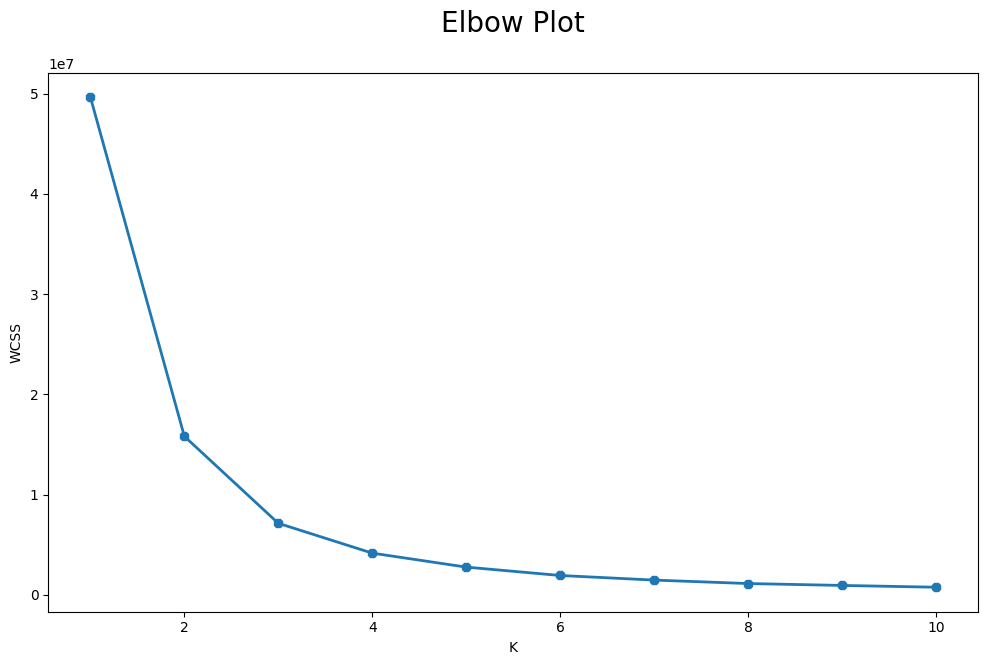

In [129]:
# create an elbow plot of WSS to recognize the best K

X1 = df.iloc[:,:].values

wcss= []
for k in range(1, 11): #I don't need to choose 11
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    # DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [130]:
#4 is the flatter point. That's why I chose 4, which is the best option

In [131]:
# TODO: create a KMeans object with this optimal number of clusters. Name this object `kmeans`

kmeans= KMeans(4) 

# TODO: fit this KMeans object using your `X1` data

kmeans.fit(X1)

KMeans(n_clusters=4)

In [132]:
labels = kmeans.fit_predict(X1)
labels #Generate labels for the dataset. arbritary label, those number does not mean anything.

array([3, 0, 0, ..., 2, 2, 2])

In [133]:
kmeans.cluster_centers_

array([[3.53326558e+01, 2.15363385e-02, 9.54333285e-02, 1.40876671e-01,
        6.13075408e-02, 1.63487401e-02, 7.16464788e-02, 8.23656639e-02,
        4.25134088e-02, 7.05007061e-02, 3.20482314e-02, 5.19630790e-02,
        2.39092427e-02, 3.29265759e-02, 1.58888631e-01, 1.36314603e-02,
        5.03005918e-01],
       [1.65955392e+02, 1.78840938e-02, 1.11774260e-01, 7.17588965e-02,
        3.67451169e-02, 1.64209177e-02, 1.72810333e-02, 6.29905120e-02,
        3.24244696e-01, 3.47013508e-02, 6.77676021e-02, 3.46989420e-02,
        2.30308772e-02, 2.46381664e-02, 4.33858434e-02, 2.49578299e-02,
        3.03863716e-01],
       [6.78155828e+01, 2.20225048e-02, 1.29094511e-01, 1.23181053e-01,
        6.00847446e-02, 1.74295384e-02, 4.30710622e-02, 7.71270018e-02,
        7.36055197e-02, 6.03091218e-02, 5.12802718e-02, 5.15539144e-02,
        2.40884279e-02, 3.08577205e-02, 1.37281431e-01, 1.70037986e-02,
        4.22668181e-01],
       [1.06702229e+02, 2.02920235e-02, 1.46805214e-01, 1.043

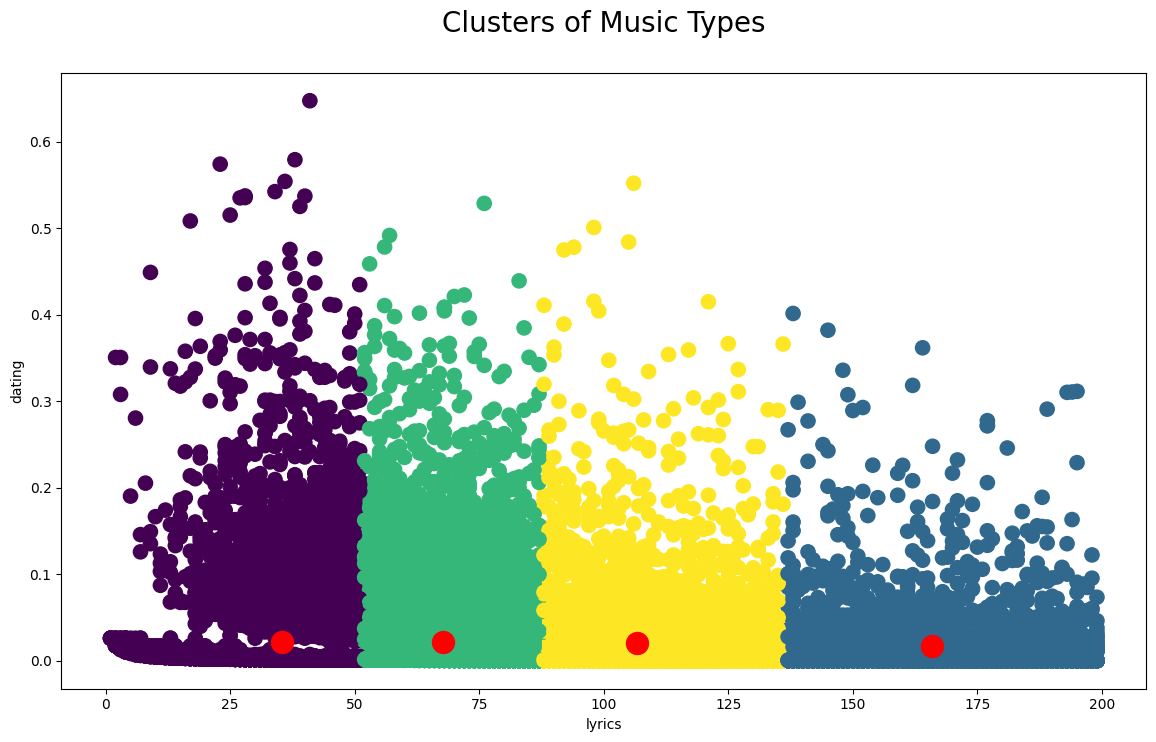

In [134]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1[:, 0], X1[:, 1], c = kmeans.labels_, s = 105)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', s = 250)## of words vs dating
plt.title('Clusters of Music Types\n', fontsize = 20)
plt.xlabel('lyrics')
plt.ylabel('dating')
plt.show()


In [135]:
df['cluster']=kmeans.labels_

In [136]:
df[df["cluster"] == 0].sample(5) 

,len,dating,violence,world/life,night/time,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,feelings,sadness,shake the audience,age,cluster
119,39,0.152986,0.003759,0.003759,0.003759,0.003759,0.300251,0.410977,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.003759,0.900000,0
13444,39,0.001422,0.001422,0.001422,0.314324,0.001422,0.001422,0.340613,0.102722,0.041543,0.001422,0.001422,0.137979,0.001422,0.044328,0.001422,0.714286,0
13081,42,0.095921,0.001548,0.001548,0.118226,0.001548,0.001548,0.001548,0.090423,0.427991,0.001548,0.001548,0.001548,0.031291,0.001548,0.001548,0.800000,0
16455,21,0.003096,0.563926,0.081443,0.003096,0.003096,0.003096,0.003096,0.003096,0.003096,0.003096,0.246241,0.003096,0.061950,0.003096,0.003096,0.100000,0
14869,38,0.001754,0.001754,0.001754,0.372140,0.001754,0.001754,0.001754,0.001754,0.001754,0.386663,0.001754,0.027590,0.054561,0.001754,0.001754,0.428571,0


In [137]:
df[df["cluster"] == 0].describe() #the fewest lyric, high dating, very low violence. It tends to be longer age. Very slow movement. The lowest obscene. 

,len,dating,violence,world/life,night/time,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,feelings,sadness,shake the audience,age,cluster
count,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.000000,10332.0
mean,35.332656,0.021536,0.095433,0.140877,0.061308,0.016349,0.071646,0.082366,0.042513,0.070501,0.032048,0.051963,0.023909,0.032927,0.158889,0.013631,0.503006,0.0
std,10.693799,0.056563,0.173074,0.190949,0.119385,0.043296,0.131154,0.122549,0.118599,0.136677,0.080280,0.097900,0.054200,0.075803,0.197735,0.038367,0.268870,0.0
min,1.000000,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.001012,0.014286,0.0
25%,28.000000,0.001595,0.001645,0.001880,0.001698,0.001548,0.001754,0.001815,0.001548,0.001698,0.001548,0.001645,0.001595,0.001645,0.002024,0.001548,0.271429,0.0
50%,37.000000,0.002105,0.002392,0.005263,0.002506,0.002105,0.002770,0.003096,0.002024,0.002506,0.002105,0.002392,0.002193,0.002392,0.044386,0.002024,0.528571,0.0
75%,44.000000,0.003759,0.109341,0.294131,0.073098,0.003509,0.081900,0.146427,0.003509,0.069689,0.003759,0.063554,0.006031,0.032920,0.321697,0.003096,0.742857,0.0
max,51.000000,0.647706,0.970395,0.962105,0.973684,0.545303,0.940789,0.645829,0.932331,0.901610,0.584705,0.642117,0.601617,0.958810,0.939148,0.450292,1.000000,0.0


In [138]:
df[df["cluster"] == 1].describe()#the longest lyric,  high dating, the highest violence, the highest obsene. 

,len,dating,violence,world/life,night/time,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,feelings,sadness,shake the audience,age,cluster
count,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.000000,2847.0
mean,165.955392,0.017884,0.111774,0.071759,0.036745,0.016421,0.017281,0.062991,0.324245,0.034701,0.067768,0.034699,0.023031,0.024638,0.043386,0.024958,0.303864,1.0
std,18.370545,0.041590,0.152517,0.116344,0.080875,0.035071,0.054142,0.082907,0.238676,0.078072,0.093686,0.063638,0.044511,0.060218,0.097443,0.044009,0.236602,0.0
min,137.000000,0.000291,0.000284,0.000291,0.000289,0.000289,0.000284,0.000291,0.000289,0.000289,0.000284,0.000284,0.000284,0.000289,0.000284,0.000284,0.014286,1.0
25%,149.000000,0.000492,0.000526,0.000532,0.000501,0.000492,0.000478,0.000532,0.054121,0.000492,0.000511,0.000492,0.000487,0.000506,0.000497,0.000537,0.100000,1.0
50%,165.000000,0.000627,0.048538,0.016765,0.000684,0.000666,0.000598,0.001385,0.358105,0.000658,0.001316,0.000666,0.000666,0.000684,0.000650,0.001144,0.242857,1.0
75%,182.000000,0.015862,0.158254,0.090721,0.040728,0.018912,0.012538,0.108309,0.502270,0.036206,0.115236,0.046184,0.029450,0.027206,0.043096,0.031034,0.442857,1.0
max,199.000000,0.401751,0.898777,0.770333,0.912057,0.479116,0.718664,0.533054,0.992298,0.645134,0.563550,0.471389,0.478925,0.676455,0.810945,0.359643,1.000000,1.0


In [139]:
df[df["cluster"] == 2].describe() #less lyric, high violence, less obsecne

,len,dating,violence,world/life,night/time,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,feelings,sadness,shake the audience,age,cluster
count,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.000000,9934.0
mean,67.815583,0.022023,0.129095,0.123181,0.060085,0.017430,0.043071,0.077127,0.073606,0.060309,0.051280,0.051554,0.024088,0.030858,0.137281,0.017004,0.422668,2.0
std,10.113153,0.052235,0.183819,0.170535,0.113418,0.041518,0.095268,0.106728,0.153806,0.123147,0.095766,0.090948,0.049771,0.069913,0.181462,0.039894,0.250212,0.0
min,52.000000,0.000605,0.000605,0.000612,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.000605,0.014286,2.0
25%,59.000000,0.000957,0.000993,0.001074,0.001012,0.000940,0.000993,0.001053,0.000940,0.000975,0.000957,0.000975,0.000957,0.000993,0.001096,0.000957,0.200000,2.0
50%,67.000000,0.001170,0.001595,0.020745,0.001385,0.001170,0.001316,0.001698,0.001170,0.001284,0.001196,0.001316,0.001224,0.001284,0.035901,0.001170,0.428571,2.0
75%,76.000000,0.002193,0.250440,0.212156,0.072425,0.002632,0.041110,0.135603,0.047331,0.056594,0.067146,0.072597,0.027708,0.035070,0.278458,0.003096,0.614286,2.0
max,87.000000,0.528992,0.981781,0.930577,0.887833,0.502873,0.874059,0.632101,0.905817,0.956938,0.638021,0.667782,0.618073,0.756655,0.981424,0.497463,1.000000,2.0


In [140]:
df[df["cluster"] == 3].describe() #long lyric, low dating, the highest violence

,len,dating,violence,world/life,night/time,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,feelings,sadness,shake the audience,age,cluster
count,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.000000,5249.0
mean,106.702229,0.020292,0.146805,0.104368,0.055592,0.018027,0.031096,0.071908,0.126272,0.052828,0.059318,0.046134,0.025374,0.030902,0.103101,0.021568,0.342370,3.0
std,13.680629,0.049099,0.186740,0.154072,0.106903,0.043547,0.078931,0.098758,0.196347,0.113231,0.098174,0.080446,0.050256,0.072036,0.162358,0.043547,0.242880,0.0
min,88.000000,0.000399,0.000399,0.000399,0.000408,0.000399,0.000399,0.000408,0.000399,0.000399,0.000399,0.000399,0.000399,0.000399,0.000399,0.000408,0.014286,3.0
25%,95.000000,0.000650,0.000684,0.000711,0.000684,0.000634,0.000658,0.000711,0.000658,0.000658,0.000650,0.000658,0.000642,0.000675,0.000711,0.000666,0.128571,3.0
50%,104.000000,0.000822,0.050295,0.018025,0.001012,0.000822,0.000877,0.001385,0.001032,0.000907,0.000907,0.000957,0.000877,0.000940,0.001253,0.000923,0.300000,3.0
75%,117.000000,0.014108,0.310161,0.149668,0.064025,0.015448,0.025095,0.122905,0.223832,0.047334,0.092357,0.064769,0.030737,0.033218,0.137548,0.024902,0.528571,3.0
max,136.000000,0.552316,0.914255,0.943858,0.726527,0.501316,0.842105,0.615064,0.948944,0.859367,0.530623,0.583932,0.498998,0.698461,0.925287,0.485646,1.000000,3.0


In [141]:
df.head()

,len,dating,violence,world/life,night/time,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,feelings,sadness,shake the audience,age,cluster
0,95,0.000598,0.063746,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.117175,0.380299,0.000598,1.0,3
1,51,0.035537,0.096777,0.443435,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,1.0,0
2,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.225422,0.002770,0.002770,1.0,0
3,54,0.048249,0.001548,0.001548,0.001548,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.001548,0.225889,0.021500,1.0,2
4,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,1.0,0


In [142]:
testdata=pd.read_csv("recommend.csv")


In [143]:
testdata.columns

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'topic',
       'age'],
      dtype='object')

In [144]:
testdata

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,...,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,topic,age
0,76885,godsmack,immune,1998,rock,come world society futher place home land deat...,74,0.000907,0.348191,0.375448,...,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.000907,0.018854,world/life,0.314286
1,65394,dennis brown,second chance,1993,reggae,maybe maybe treat good feel second best girl s...,43,0.001224,0.029943,0.001224,...,0.001224,0.001224,0.001224,0.001224,0.001224,0.056842,0.001224,0.062092,night/time,0.385714
2,10980,the black crowes,sister luck,1990,pop,worry sick eye hurt rest head life outside gir...,54,0.001120,0.482490,0.001120,...,0.001120,0.001120,0.001120,0.078222,0.001120,0.051132,0.031571,0.202862,violence,0.428571
3,842,jerry lee lewis,your cheating heart,1960,pop,cheat heart weep sleep sleep come night cheat ...,25,0.204740,0.002506,0.002506,...,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,sadness,0.857143
4,2764,paul anka,eso beso,1966,pop,beso kiss beso kiss know samba bossanova close...,97,0.001170,0.001170,0.001170,...,0.001170,0.001170,0.001170,0.314626,0.001170,0.053731,0.001170,0.001170,romantic,0.771429
5,54425,noro morales,silencio,1952,jazz,fear dark fear thunder fear silence spirit dea...,57,0.001462,0.487965,0.140561,...,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.001462,0.034645,violence,0.971429
6,77225,rage against the machine,pistol grip pump,2000,rock,pistolgrip pump time pistolgrip pump time pist...,152,0.000675,0.000675,0.134044,...,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.000675,obscene,0.285714
7,42962,taste,railway and gun,1970,blues,railway leave time choose tell tell lose throw...,37,0.051874,0.001645,0.001645,...,0.001645,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,sadness,0.714286
8,28825,randy travis,messin' with my mind,1986,country,say thing care hang long ahead leave start mes...,41,0.001504,0.001504,0.132148,...,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,night/time,0.485714
9,16881,paramore,playing god,2009,pop,decisions precision maybe want change simply a...,91,0.000711,0.543658,0.114697,...,0.000711,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,violence,0.157143


In [145]:
testdata.drop(columns=['Unnamed: 0','artist_name','track_name', 'release_date','genre','lyrics','topic'],inplace=True)

In [146]:
testdata.drop(columns=['like/girls'], inplace=True)

In [147]:
df.columns

Index(['len', 'dating', 'violence', 'world/life', 'night/time',
       'family/gospel', 'romantic', 'communication', 'obscene', 'music',
       'movement/places', 'light/visual perceptions', 'family/spiritual',
       'feelings', 'sadness', 'shake the audience', 'age', 'cluster'],
      dtype='object')

In [148]:
testdata.columns

Index(['len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'sadness', 'feelings', 'age'],
      dtype='object')

In [149]:
testdata

,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,sadness,feelings,age
0,74,0.000907,0.348191,0.375448,0.000907,0.225414,0.000907,0.000907,0.000907,0.000907,0.019389,0.000907,0.000907,0.000907,0.000907,0.018854,0.314286
1,43,0.001224,0.029943,0.001224,0.306688,0.001224,0.033440,0.069637,0.426669,0.001224,0.001224,0.001224,0.001224,0.001224,0.001224,0.062092,0.385714
2,54,0.001120,0.482490,0.001120,0.001120,0.001120,0.113651,0.001120,0.001120,0.001120,0.001120,0.001120,0.078222,0.001120,0.031571,0.202862,0.428571
3,25,0.204740,0.002506,0.002506,0.129818,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.002506,0.474607,0.002506,0.857143
4,97,0.001170,0.001170,0.001170,0.050289,0.001170,0.023530,0.541449,0.001170,0.001170,0.001170,0.001170,0.314626,0.001170,0.001170,0.001170,0.771429
5,57,0.001462,0.487965,0.140561,0.001462,0.001462,0.001462,0.001462,0.238731,0.001462,0.001462,0.001462,0.001462,0.077630,0.001462,0.034645,0.971429
6,152,0.000675,0.000675,0.134044,0.293819,0.000675,0.000675,0.012990,0.066012,0.460145,0.000675,0.000675,0.000675,0.024217,0.000675,0.000675,0.285714
7,37,0.051874,0.001645,0.001645,0.084118,0.037341,0.001645,0.001645,0.460564,0.001645,0.001645,0.001645,0.001645,0.001645,0.314594,0.001645,0.714286
8,41,0.001504,0.001504,0.132148,0.492312,0.001504,0.001504,0.001504,0.321439,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.001504,0.485714
9,91,0.000711,0.543658,0.114697,0.098286,0.014720,0.000711,0.000711,0.075524,0.000711,0.000711,0.000711,0.000711,0.000711,0.118886,0.015028,0.157143


In [150]:
kmeans.predict(testdata)

c:\Users\1288302\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


array([2, 0, 2, 0, 3, 2, 1, 0, 0, 3])

 KMeans on 2 parameters with Scaling. 

In [151]:
scaler = StandardScaler()             
X1_scaled = scaler.fit_transform(X1)

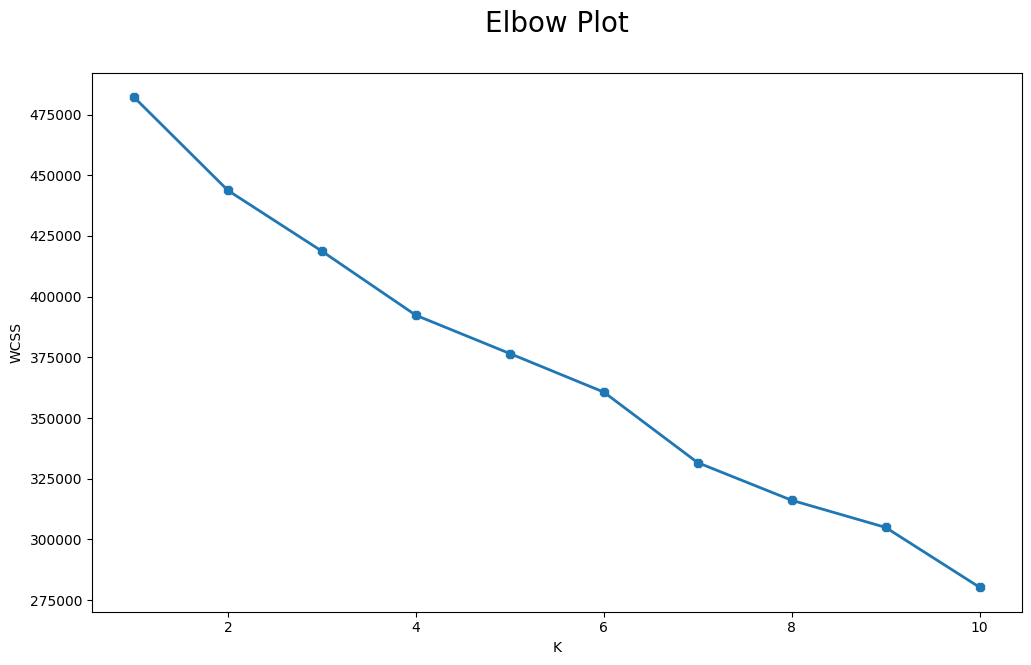

In [152]:
wcss_scaled = []
for k in range(1, 11):
    # TODO: create a Kmeans object initialized with `k` clusters and `init` parameter of `k-means++`
    # DOCUMENTATION: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
    kmeans = KMeans(n_clusters= k, init="k-means++")

    # TODO: fit your kmeans algorithm on your scaled dataset
    kmeans.fit(X1_scaled)

    # TODO: append the WCSS aka inertia to your wcss_scaled list
    wcss_scaled.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss_scaled, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()

In [161]:
#create a new KMeans object with this optimal number of clusters. Name this object `kmeans_scaled`
kmeans_scaled = KMeans(n_clusters = 8, init = 'k-means++') 
#fit this KMeans object on my data
kmeans.fit(X1_scaled)

KMeans(n_clusters=4)

In [162]:
#Generate labels for the  dataset
labels = kmeans_scaled.fit_predict(X1_scaled)
labels

array([3, 7, 4, ..., 2, 2, 2])

In [165]:
kmeans_scaled.cluster_centers_

array([[ 0.03391261, -0.14393719,  1.83054372, -0.35905614, -0.19862929,
        -0.00804909, -0.25422084,  0.05997447, -0.38011973, -0.26760208,
        -0.22690228, -0.16021852, -0.06256252, -0.09878496, -0.39653367,
         0.0122361 , -0.31365397],
       [-0.31004467, -0.0223832 , -0.45503826,  1.40026245, -0.21986668,
         0.03824498, -0.12784598,  0.12253519, -0.40056523,  0.48844498,
        -0.29367828, -0.2163471 , -0.15295461, -0.0738569 , -0.36332816,
        -0.02313524,  0.1693226 ],
       [ 1.11879298,  0.00383966, -0.35572304, -0.44627576, -0.26279833,
         0.02120126, -0.33028575, -0.04281976,  2.03577224, -0.27530802,
        -0.00993428, -0.28590151, -0.20575754, -0.14589003, -0.57269983,
         0.27103161, -0.50368038],
       [-0.33074394,  0.09331476, -0.46260282, -0.37508045, -0.18622605,
        -0.02495595, -0.07860796,  0.22215246, -0.42331581, -0.19926844,
        -0.29607525, -0.23919529, -0.20273152, -0.09646115,  1.73011295,
        -0.05763381

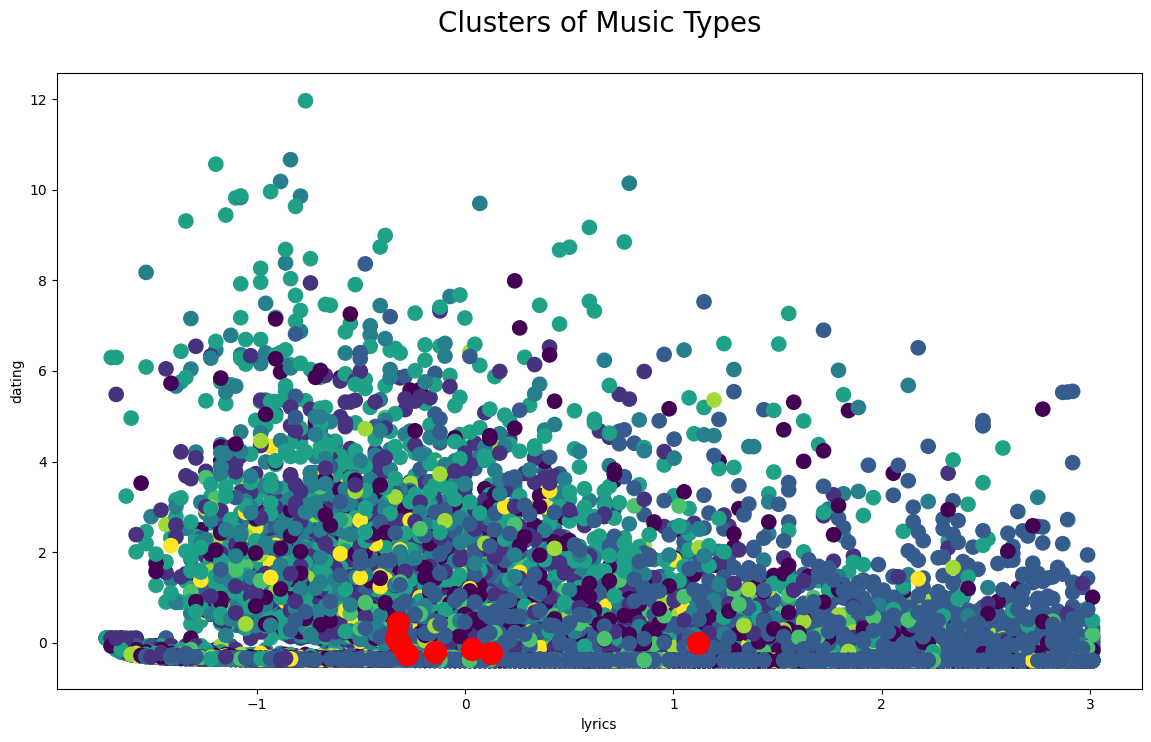

In [166]:
# view 2D clusters

plt.figure(figsize = (14, 8))

plt.scatter(X1_scaled[:, 0], X1_scaled[:, 1], c = kmeans_scaled.labels_, s = 105)
plt.scatter(kmeans_scaled.cluster_centers_[:, 0], kmeans_scaled.cluster_centers_[:, 1], color = 'red', s = 250)
plt.title('Clusters of Music Types\n', fontsize = 20)
plt.xlabel('lyrics')
plt.ylabel('dating')
plt.show()



Kmeans with 3 Predicctors!!!!!!

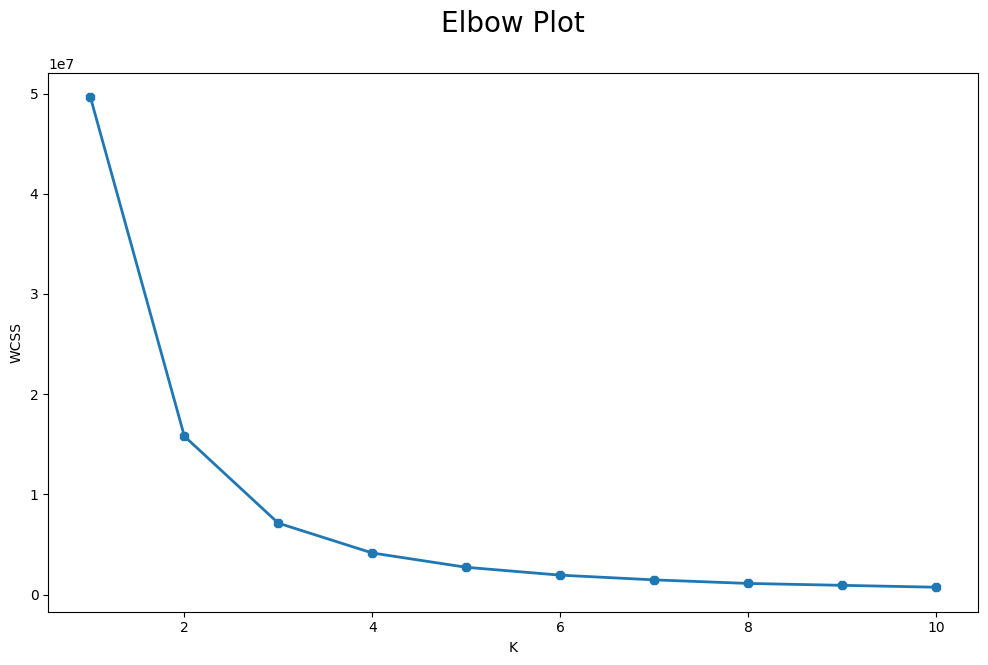

In [157]:
X4 = df[['len', 'dating', 'violence']]

wcss= []
for k in range(1, 11):
    kmeans = KMeans(n_clusters = k, init = 'k-means++')
    kmeans.fit(X4)
    wcss.append(kmeans.inertia_)

plt.figure(figsize = (12, 7))

plt.plot(range(1, 11), wcss, linewidth = 2, marker = '8')
plt.title('Elbow Plot\n', fontsize = 20)
plt.xlabel('K')
plt.ylabel('WCSS')
plt.show()
wcss= []


In [158]:
kmeans = KMeans(n_clusters = 4) #choose the best cluster number, which is 4
clusters = kmeans.fit_predict(X4)
X4['label'] = clusters

C:\Users\1288302\AppData\Local\Temp\ipykernel_10884\504606106.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X4['label'] = clusters


In [159]:
X4['label']

0        1
1        0
2        0
3        2
4        0
        ..
28357    2
28358    2
28359    2
28360    2
28361    2
Name: label, Length: 28362, dtype: int32

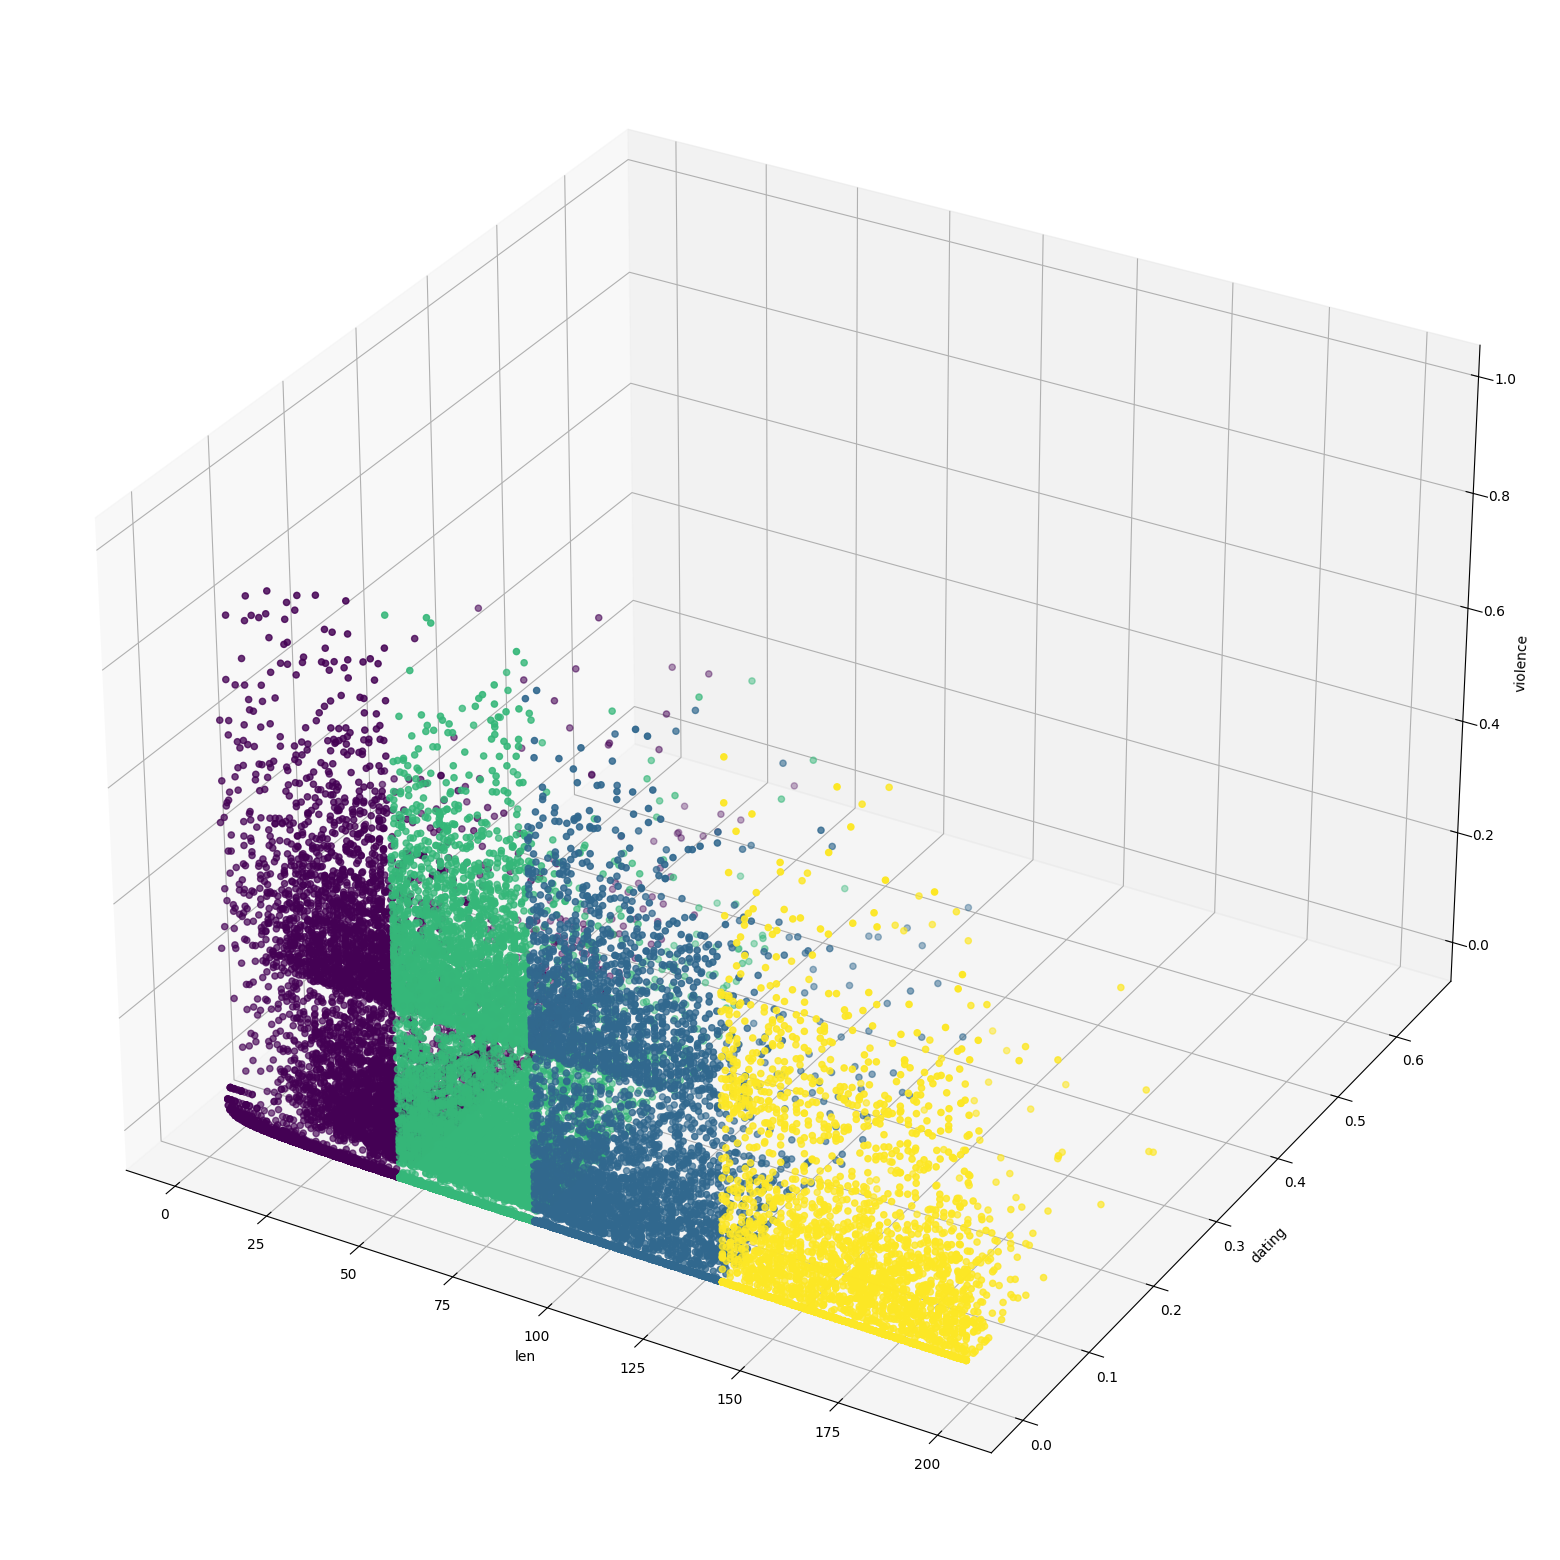

In [160]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')

ax.scatter(X4["len"], X4["dating"], X4["violence"], c=X4["label"])
#'danceability', 'energy'
ax.set_xlabel('len')
ax.set_ylabel('dating')
ax.set_zlabel('violence')


plt.gcf().set_size_inches((20, 20))  
plt.show()